/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


<Figure size 1200x800 with 0 Axes>

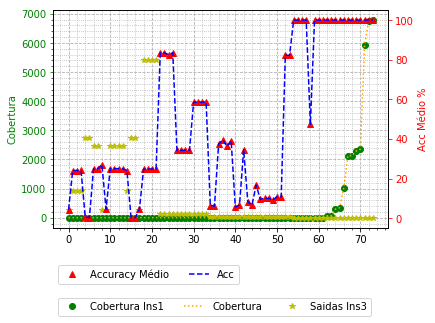

In [51]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
headers = ['Case','Linhas','Saidas','Acc']
df = pd.read_csv('Nrlinhas-VS-accuracy.csv', encoding='utf8', names=headers)


df["Cobertura"] = df['Linhas'] / np.exp(df['Saidas']*3)
#df["Cobertura"] = df['Linhas'] / (2 ** df['Saidas'])
df = df.sort_values(by=['Cobertura'])

x = list(range(len(df['Case'])))
#data1 = np.log(df['Linhas'])
#df = df.sort_values(by='Linhas')
data1 = df['Cobertura']
data2 = df['Saidas']
data3 = df['Acc']

my_dpi=250

fig = plt.figure(figsize=(1200/my_dpi, 800/my_dpi), dpi=my_dpi)
fig, ax1 = plt.subplots()

plt.minorticks_on()
plt.grid(which='major', linestyle='--')
plt.grid(which='minor', linestyle=':')

ax1.set_ylabel('Cobertura', color='g') #verde
ax1.tick_params('y', colors='g')

lns1 = plt.plot(x,data1, 'go', label='Cobertura lns1') # green bolinha
lns1 = plt.plot(x,data1, 'k:', color='orange')


ax2 = ax1.twinx()

lns2 = ax2.plot(x,data3, 'r^' , label='Accuracy Médio') # red triangulo 
lns2 = ax2.plot(x,data3, 'k--', color='blue')  # linha tracejada azul
#ax3 = ax1.twinx()
#lns3 = ax3.plot(x,data2, 'm*' , label='saidas') 
lns3 = ax1.plot(x,data2, 'y*' , label='Saidas lns3')
#lns3 = ax1.plot(x,data2, 'k--', color='red')

ax2.set_ylabel('Acc Médio %', color='r')
ax2.tick_params('y', colors='r')


ax1.legend(loc='upper left', bbox_to_anchor=(0.0, -0.30), shadow=False, ncol=5)
ax2.legend(loc='upper left', bbox_to_anchor=(0.0, -0.15), shadow=False, ncol=5)
fig.savefig('LinhasSimul-VS-Accuracy.png',dpi=100)
#print(df)